In [11]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import the dataset
d_data = pd.read_csv("diabetes_dirty.csv")
d_data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [12]:
# Explore the data
d_data.info()
d_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [13]:
# Select the independent variables
X = d_data.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values
X[0:10]

array([[ 59.    ,   2.    ,  32.1   , 101.    , 157.    ,  93.2   ,
         38.    ,   4.    ,   4.8598,  87.    ],
       [ 48.    ,   1.    ,  21.6   ,  87.    , 183.    , 103.2   ,
         70.    ,   3.    ,   3.8918,  69.    ],
       [ 72.    ,   2.    ,  30.5   ,  93.    , 156.    ,  93.6   ,
         41.    ,   4.    ,   4.6728,  85.    ],
       [ 24.    ,   1.    ,  25.3   ,  84.    , 198.    , 131.4   ,
         40.    ,   5.    ,   4.8903,  89.    ],
       [ 50.    ,   1.    ,  23.    , 101.    , 192.    , 125.4   ,
         52.    ,   4.    ,   4.2905,  80.    ],
       [ 23.    ,   1.    ,  22.6   ,  89.    , 139.    ,  64.8   ,
         61.    ,   2.    ,   4.1897,  68.    ],
       [ 36.    ,   2.    ,  22.    ,  90.    , 160.    ,  99.6   ,
         50.    ,   3.    ,   3.9512,  82.    ],
       [ 66.    ,   2.    ,  26.2   , 114.    , 255.    , 185.    ,
         56.    ,   4.55  ,   4.2485,  92.    ],
       [ 60.    ,   2.    ,  32.1   ,  83.    , 179.    , 119.4 

In [14]:
# Select and reshape data
y = d_data.iloc[:,10].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# Create an empty linear regression model
diabetes_model = LinearRegression()

# Create the model using fit(X,y)
diabetes_model.fit(X,y)

# Get intercept and coefficients
print('Intercept: \n', diabetes_model.intercept_)
print('Coefficients: \n', diabetes_model.coef_)

Intercept: 
 [-334.56713852]
Coefficients: 
 [[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
  -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
   6.84831250e+01  2.80116989e-01]]


In [15]:
# Split data into training and test sets comprising 80% and 20% respectively
rseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=rseed, shuffle=True,)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (353, 10) (353, 1)
Test data: (89, 10) (89, 1)


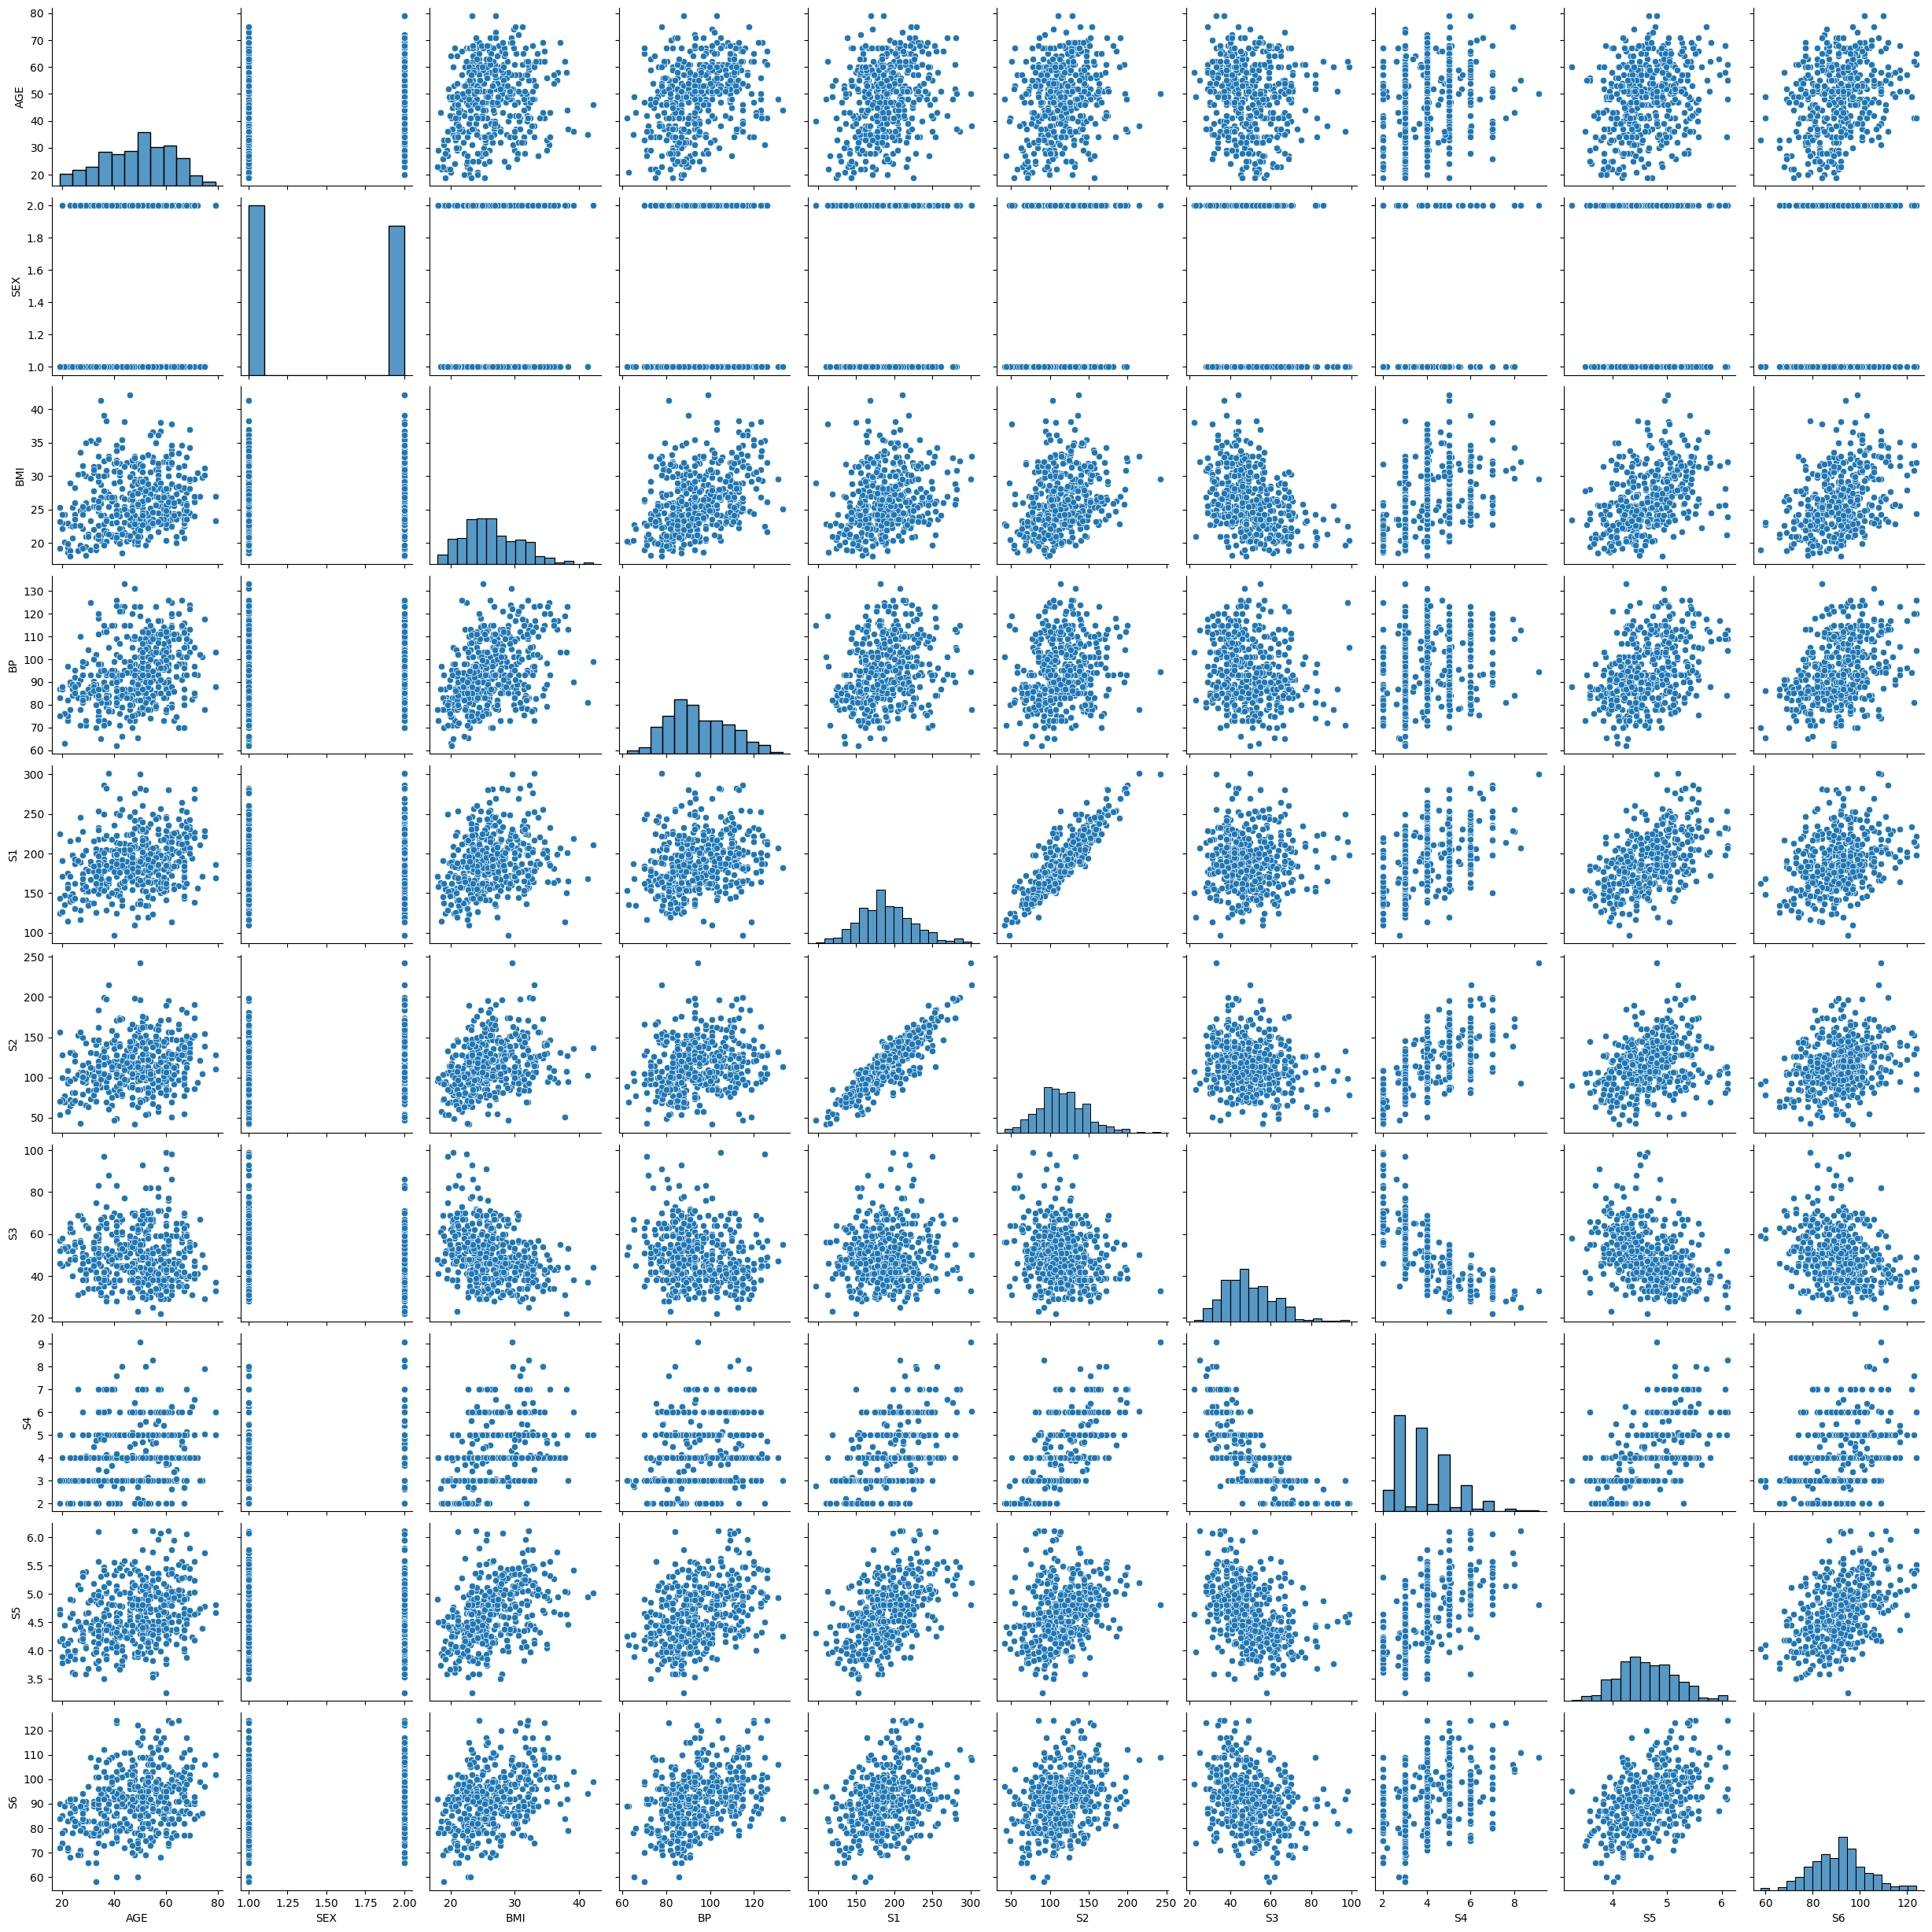

In [16]:
# Plot the distribution of the data
sns.pairplot(data=d_data.drop('PROGRESSION', axis=1))

The features follow a Gaussian distribution, therefore standardisation was used.

In [17]:
# Standardise data
# Fit the scaler on training set
sc = StandardScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Fit a linear regression model
lr = LinearRegression()
model = lr.fit(X_train, y_train)

# Generate predictions for the test set
predictions = lr.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lr.predict(X_line)

# Print intercepts and coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 [153.73654391]
Coefficients: 
 [[  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
   24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]]


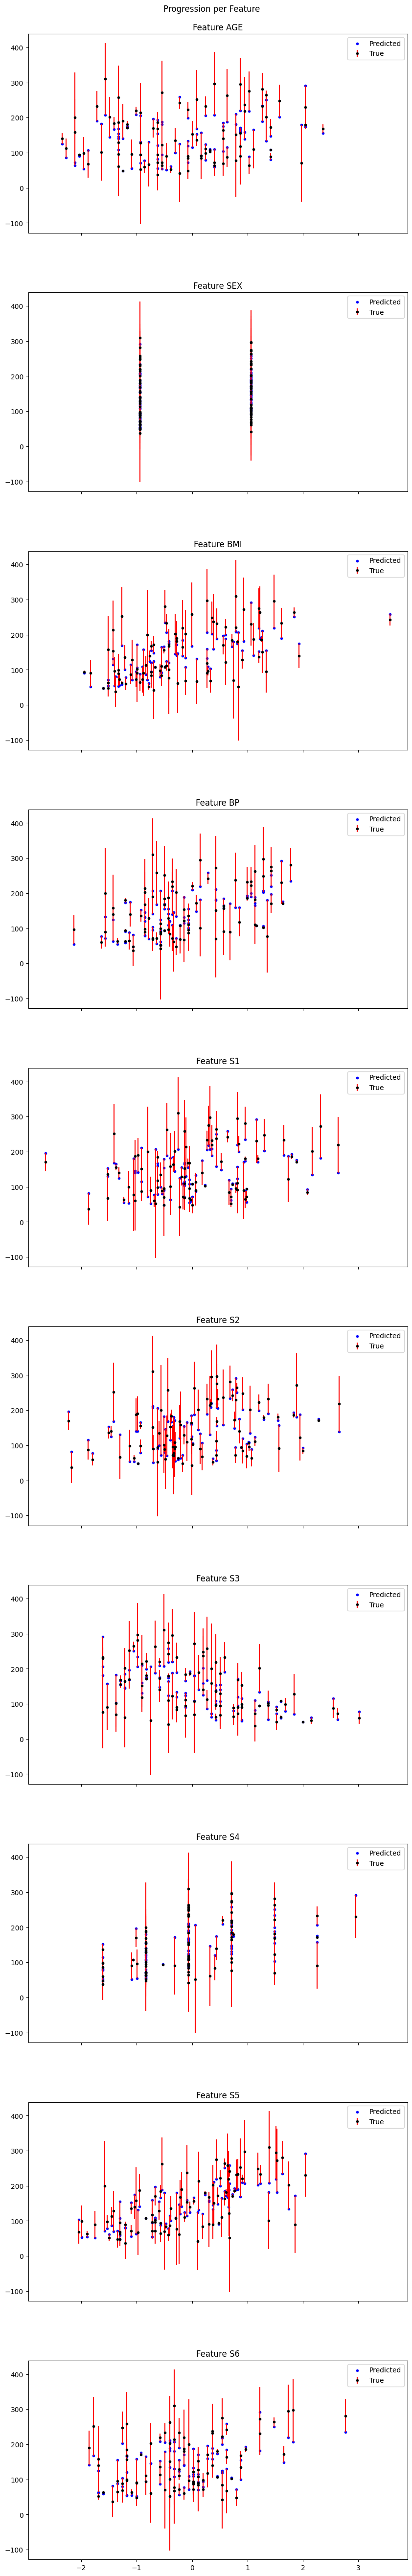

In [19]:
num_features = X_test.shape[1]

# Set plots per row
rows = (num_features // 1) + (num_features % 1 > 0)
cols = 1

fig, ax = plt.subplots(rows, cols, figsize=(10, rows * 6), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.3, top=0.97)
fig.suptitle("Progression per Feature")

# Flatten the axes array for iteration
ax = ax.flatten()

# Get values for the error bar
error_bar_values = np.abs((y_test - predictions)[:, 0])

# Plot data, predicted values, and error bars
for i in range(num_features):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:, i], predictions[:, 0], c='b', marker='.', label='Predicted')
    ax[i].set_title(f"Feature {d_data.columns[i]}")
    ax[i].legend(loc='best', fontsize='medium')

plt.show()

In [21]:
# R squared score
# Print ("R2 Score:", round (model.score(X_train, y_train), 3))
# Checked training data to ensure the R2 was not too much higher. 52.7%
print ("R2 Score:", round (model.score(X_test, y_test), 2))

R2 Score: 0.45


### The R2 Score for the test data is 45%

This shows that only 45% of the variability observed in the dependent variable is explained by the independent variables in the linear regression model. The lower R2 score may not necissarily mean the model is irrelevant, it may indicate the independent variables do not explain a large portion of the variance in the dependent variable, however it does provide a better model than the mean. The combined R2 represents the total variance explained by all the predictors together, accounting for shared contribution to the progression.